***
# `Project:` Prevendo a Ocorrências de Crises Epiléticas

## `Date:` dezembro, 2021

## `Data Scientist:` Walter Trevisan
***

# `Análise Exploratória`

Nesta etapa, vamos realizar a **`Análise Exploratória`** dos dados, utilizando o *dataset* de treinamento que foi preparado na etapa anterior, ou seja, o *data frame* que foi salvo no arquivo **`strat_train_set.pck`**.

Então, vamos realizar as seguintes atividades:

1. Carregar o *data frame* de treinamento, salvo no arquivo **`strat_train_set.pck`**;

2. Entender as informações e os tipos de dados.

## Setup:

Primeiro, vamos carregar os **pacotes e funções** que serão utilizadas neste **notebook**.

In [1]:
# As novas versões do Pandas e Matplotlib trazem diversas mensagens de aviso ao desenvolvedor.
# Então, vamos desativar essas mensagens.
import sys # O pacote "sys" permite manipulações com o sistema operacional:
import os  # Operation System (Packages and Functions)
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Importa função para verificarmos a versão da linguagem python:
from platform import python_version

# Importando os pacote NumPy:
import numpy as np
# Importando os pacote Pandas:
import pandas as pd

# Importando pacotes para visualização de gráficos:
import matplotlib as mpl
import matplotlib.pyplot as plt
# Importa o pacote "seaborn" para criarmos gráficos estatísticos:
import seaborn as sns
%matplotlib inline

# Definindo o diretório raiz (Root) onde serão armazenados todas as informações
# (Imagens, Gráficos, Objetos, Dados, Modelos de ML, etc...) do projeto.
# Diretório Raiz (Root) do Projeto:
ROOT_DIR = "."

# Path: onde ficarão armazenados os "Objetos" (Estrututras de Dados) relacionados ao Projeto:
OBJ_PATH = os.path.join(ROOT_DIR, "objects")
# Criando o diretório, se ele não existir:
os.makedirs(OBJ_PATH, exist_ok=True)

# Path: onde ficarão armazenados os "datasets" (arquivos "csv") e os "objetos" (Data Frames) do Projeto:
DATA_PATH = os.path.join(ROOT_DIR, "data")
# Criando o diretório, se ele não existir:
os.makedirs(DATA_PATH, exist_ok=True)

# Path: onde serão armazenadas as "Imagens" (Figuras e Gráficos) do Projeto:
GRAPHICS_PATH = os.path.join(ROOT_DIR, "images", "graphics")
# Criando o diretório, se ele não existir:
os.makedirs(GRAPHICS_PATH, exist_ok=True)

# Path: onde estão armazenadas as classes e funções que serão utilizadas neste notebook:
LIB_PATH = os.path.join(ROOT_DIR, "library")

# Adicionando o diretório "./library" ao 'path' do Sistema, para podermos importar classes e funções que serão
# utilizadas neste notebook:
sys.path.append(LIB_PATH)

# Importando para este notebook, as classes e funções definidas no módulo "data_science_library.py":
import data_science_library as dslib

# Importando para este notebook, as classes e funções definidas no módulo "plot_library.py":
import plot_library as ptlib

print("Setup Complete!")

Setup Complete!


In [2]:
# Versões dos pacotes usados neste jupyter notebook:
print("Versões dos pacotes usados neste jupyter notebook:")
print("Python    : {}".format(python_version()))
print("Numpy     : {}".format(np.__version__))
print("Pandas    : {}".format(pd.__version__))
print("Matplotlib: {}".format(mpl.__version__))
print("Seaborn   : {}".format(sns.__version__))

Versões dos pacotes usados neste jupyter notebook:
Python    : 3.7.11
Numpy     : 1.21.2
Pandas    : 1.3.4
Matplotlib: 3.5.0
Seaborn   : 0.11.2


## 1- Carregar o *data frame* de treinamento: `strat_train_set.pck`

In [3]:
# Carregando o objeto (data frame) "strat_train_set":
train_df = dslib.pickle_object_load(
    path=DATA_PATH, file="strat_train_set.pck",
    msg="O arquivo 'strat_train_set.pck' (data frame) foi carregado com sucesso!"
)

O arquivo 'strat_train_set.pck' (data frame) foi carregado com sucesso!


## 2- Entender as informações e os tipos de dados do *dataset*

Visualizando os primeiros 10 registros do nosso *dataset*:

In [4]:
# Visualizando os primeiros 10 registros:
train_df.head(10)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X5.V1.617,57,-36,-111,-185,-257,-324,-369,-394,-387,...,503,703,669,565,461,345,207,64,-88,1
1,X21.V1.893,-69,-67,-60,-62,-66,-66,-59,-56,-51,...,-67,-68,-63,-53,-42,-32,-24,-13,-4,2
2,X5.V1.90,-78,-75,-68,-57,-26,-19,11,13,25,...,46,30,23,29,40,52,44,39,21,5
3,X17.V1.583,1,2,11,21,25,35,43,50,54,...,22,19,15,14,14,15,15,9,3,2
4,X8.V1.103,-111,-105,-100,-91,-84,-76,-74,-68,-54,...,2,3,5,8,10,6,1,-3,-13,2
5,X4.V1.532,-11,-16,-22,-6,9,33,48,46,25,...,-80,-93,-106,-114,-119,-123,-134,-134,-137,3
6,X14.V1.162,-114,-121,-133,-139,-130,-111,-115,-141,-156,...,80,35,-9,-34,-48,-51,-69,-61,-55,3
7,X20.V1.83,35,39,36,39,27,28,39,60,74,...,63,75,74,62,66,62,73,78,67,5
8,X17.V1.444,-37,-14,3,17,29,44,55,62,60,...,-147,-156,-162,-160,-160,-161,-163,-163,-157,1
9,X22.V1.803,21,30,29,31,33,32,30,33,35,...,52,50,53,52,51,52,50,47,41,2


In [5]:
# Obtendo um resumo dos dados:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Columns: 180 entries, Unnamed: 0 to y
dtypes: int64(179), object(1)
memory usage: 12.6+ MB


**Análise:** o nosso *dataset* de treinamento (`train_df`) possui um total de **9200** observações, com **179** atributos (variáveis preditoras) e a nossa variável ***target*** (**`y`**). Temos **`179`** atributos do tipo **`int64`** e **`1`** atributo do tipo **`object`**.

### Analisando as variáveis explicativas (preditoras): `X1, X2, ..., X178`

In [6]:
# Obtendo o label das variáveis preditoras (features):
features = train_df.columns

# Elimina as features "Unnamed: 0" e "y" (Target), transformando o resultado em uma lista:
features = list(features.drop(['Unnamed: 0', 'y']))

# Obtendo um resumo estatístico das variáveis preditoras:
train_df[features].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
X1,9200.0,-12.129783,166.927237,-1839.0,-54.0,-8.0,34.0,1726.0
X2,9200.0,-11.395652,167.749477,-1838.0,-54.0,-7.0,35.0,1713.0
X3,9200.0,-10.410543,165.175056,-1835.0,-54.0,-7.0,35.0,1697.0
X4,9200.0,-9.031957,162.682278,-1845.0,-54.0,-7.0,36.0,1612.0
X5,9200.0,-7.652717,161.893735,-1791.0,-53.0,-8.0,36.0,1437.0
...,...,...,...,...,...,...,...,...
X174,9200.0,-12.357935,167.078527,-1866.0,-55.0,-9.5,34.0,1733.0
X175,9200.0,-12.100978,164.367162,-1863.0,-55.0,-9.0,34.0,1958.0
X176,9200.0,-12.122065,163.847733,-1781.0,-55.0,-9.0,34.0,2047.0
X177,9200.0,-12.117500,164.099167,-1568.0,-55.0,-9.0,35.0,2047.0


In [7]:
# Obtendo um resumo estatístico das variáveis preditoras:
dslib.statistical_measures(df=train_df, feature=features, decimals=3).transpose()

,mean,median,mode,var,std,var_coff,skewness,kurtosis
X1,-12.130,-8.0,-1.0,27864.702,166.927,-1376.177,-0.387,19.136
X2,-11.396,-7.0,-1.0,28139.887,167.749,-1472.048,-0.361,18.554
X3,-10.411,-7.0,-1.0,27282.799,165.175,-1586.613,-0.592,18.969
X4,-9.032,-7.0,0.0,26465.524,162.682,-1801.185,-0.628,19.019
X5,-7.653,-8.0,-24.0,26209.581,161.894,-2115.507,-0.447,18.329
...,...,...,...,...,...,...,...,...
X174,-12.358,-9.5,-13.0,27915.234,167.079,-1351.994,-0.625,18.619
X175,-12.101,-9.0,8.0,27016.564,164.367,-1358.296,-0.701,21.198
X176,-12.122,-9.0,11.0,26846.080,163.848,-1351.649,-0.782,23.722
X177,-12.118,-9.0,-1.0,26928.537,164.099,-1354.233,-0.495,20.899


**Análise:** O conjunto de dados tem apenas um recurso exclusivo, e essas são as leituras de **EEG**. As colunas são divididas para capturar a leitura do EEG em um ponto no tempo e todos os pontos no tempo (todas as 178 colunas) existem no mesmo segundo.

Observamos nas informações estatísticas que existem valores em diversas **escalas numéricas**, ou seja, precisaremos **normalizar** os dados dependendo do tipo de algoritmo utilizado na etapa de modelagem.

### Analisando a variável *target* (dependente): `y`

Saving figure: plot_target_count


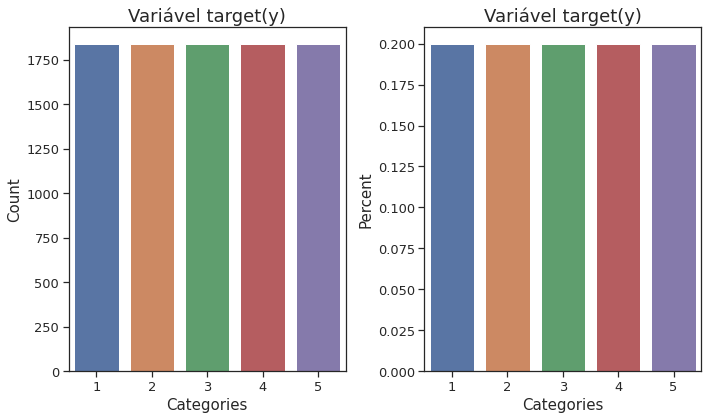

,y,Total,Percent
0,1,1840,0.2
1,2,1840,0.2
2,3,1840,0.2
3,4,1840,0.2
4,5,1840,0.2


In [8]:
# Vamos plotar as contagens de observações e as proporções de cada categoria:
ptlib.plot_percent_count_feature(
    df=train_df, feature='y', plot_style='ticks',
    title='Variável target(y)', title_fontsize=18, title_share=False,
    xlabel1="Categories", xlabel1_fontsize=15, xlabel2="Categories", xlabel2_fontsize=15,
    ylabel_fontsize=15, columns_nr=2, rows_nr=1, share_x=False, share_y=False,
    width=10, height=6, xtick_labelsize=13, ytick_labelsize=13, wspace=None, hspace=None,
    figure_id='plot_target_count', figure_path=GRAPHICS_PATH,
    figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
)

**Análise:** podemos observar que os dados estão **balanceados**, ou seja, cada categoria possui a mesma quantiade de observações (**20%) dentro do *dataset*.

Entretanto, como iremos trabalhar neste projeto com apenas 2 categorias, o nosso *dataset* ficará **desbalanceado** porque a categoria **1** (representa convulsão) terá **20%** de observações e a categoria **0** (são as demais categorias que não representam convulsão) terá **80%** de observações.

Portanto, na etapa de modelagem deveremos realizar o **balanceamento** dos dados uma vez que iremos trabalhar com apenas duas categorias (classificação binária).

### Conclusão:

Na etapa de **análise exploratória dos dados** concluímos que:

1. a primeira coluna (`Unnamed: 0`) do conjuto de dados não possui qualquer informação relevante para o projeto e, portanto, deverá ser eliminada na etapa de **preparação dos dados**;

2. embora existam 5 classes, neste projeto vamos realizar a **classificação binária**, ou seja, a classe **1** (**convulsão epilética**) contra as demais classes que neste caso serão representadas pela classe **0**. Portanto, a variável target **`y`** deverá ser transformada em **duas classes** na etapa de **preparação dos dados**;

3. as variávei explicativas **`X1,X2,...,X178`** possuem valores em **escalas numéricas** diferentes, ou seja, os dados precisarão ser **normalizados** para que seus valores fiquem na mesma escala;

4. precisaremos **balancear** o *dataset* de treino para a etapa de **modelagem**.

## <font color='black'>FIM</font>